<a href="https://colab.research.google.com/github/shanojpillai/GenerativeAI_100Days/blob/main/Bank_Customer_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction Project**

### **Project Overview**

*  **Project Title:** Bank Customer Churn Prediction for ABC Multistate Bank

*  **Objective:** Predict customer churn for ABC Multistate Bank, i.e., identify customers likely to leave the bank based on historical data and specific customer features.

*  **Target Variable:** churn (1 if the customer left the bank, 0 otherwise)

*  **Dataset Summary:** The dataset contains various features, such as customer demographics, account balance, and banking behavior, for thousands of customers of ABC Multistate Bank.

# Document Structure

**Data Exploration:** Initial analysis of the dataset to understand its
structure, assess data quality, and identify potential preprocessing steps.

*  **Data Preprocessing:** Preparation of the dataset for modeling, including handling missing values, encoding categorical features, and scaling numeric features.

*  **Model Building:** Selecting a suitable model to predict churn, starting with logistic regression as a baseline model.

*  **Model Evaluation:** Evaluating model performance with various metrics and adjusting the model if needed.

*  **Future Improvements:** Suggestions for model improvements and extensions for future work.

Step 1: Data Exploration
Objective
The goal of data exploration is to understand the dataset’s structure, identify missing values, and uncover patterns that might inform model building.

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

# Display the first few rows of the dataset
data.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# Check column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())



Column Names and Data Types:
credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany        bool
country_Spain          bool
gender_Male            bool
dtype: object

Missing Values in Each Column:
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_Germany     0
country_Spain       0
gender_Male         0
dtype: int64


In [14]:
# Check column names and data types
print("Column Names and Data Types:")
print(data.dtypes)

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Column Names and Data Types:
credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_Germany        bool
country_Spain          bool
gender_Male            bool
dtype: object

Missing Values in Each Column:
credit_score        0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
country_Germany     0
country_Spain       0
gender_Male         0
dtype: int64


In [15]:
# Drop 'customer_id' column if it exists
if 'customer_id' in data.columns:
    data = data.drop(['customer_id'], axis=1)


In [16]:
# Check if 'country' and 'gender' exist in the columns and apply one-hot encoding
categorical_columns = ['country', 'gender']
for column in categorical_columns:
    if column in data.columns:
        data = pd.get_dummies(data, columns=[column], drop_first=True)


In [17]:
# Check if 'churn' column exists
if 'churn' in data.columns:
    X = data.drop('churn', axis=1)
    y = data['churn']
else:
    raise KeyError("The 'churn' column is missing from the dataset.")


In [18]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training set; transform the testing set
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Logistic Regression Model Performance:
Accuracy: 0.811
Precision: 0.5524475524475524
Recall: 0.2010178117048346
F1 Score: 0.2947761194029851


In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit Logistic Regression with class weights
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred_weighted = model.predict(X_test)

# Recalculate performance metrics
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

print("Logistic Regression with Class Weights Performance:")
print(f"Accuracy: {accuracy_weighted}")
print(f"Precision: {precision_weighted}")
print(f"Recall: {recall_weighted}")
print(f"F1 Score: {f1_weighted}")


Logistic Regression with Class Weights Performance:
Accuracy: 0.7195
Precision: 0.38461538461538464
Recall: 0.712468193384224
F1 Score: 0.49955396966993754


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit Random Forest with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest with Class Weights Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")


Random Forest with Class Weights Performance:
Accuracy: 0.8685
Precision: 0.7850877192982456
Recall: 0.455470737913486
F1 Score: 0.5764895330112721


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'),
                           param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Retrieve the best model from grid search
best_rf_model = grid_search.best_estimator_
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Calculate performance metrics for the tuned Random Forest model
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
precision_tuned_rf = precision_score(y_test, y_pred_tuned_rf)
recall_tuned_rf = recall_score(y_test, y_pred_tuned_rf)
f1_tuned_rf = f1_score(y_test, y_pred_tuned_rf)

print("Tuned Random Forest Performance:")
print(f"Accuracy: {accuracy_tuned_rf}")
print(f"Precision: {precision_tuned_rf}")
print(f"Recall: {recall_tuned_rf}")
print(f"F1 Score: {f1_tuned_rf}")


Tuned Random Forest Performance:
Accuracy: 0.848
Precision: 0.5991091314031181
Recall: 0.6844783715012722
F1 Score: 0.6389548693586699


In [25]:
# Get the predicted probabilities
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

# Set a new threshold, e.g., 0.4 instead of the default 0.5
threshold = 0.4
y_pred_threshold_adjusted = (y_prob >= threshold).astype(int)

# Recalculate performance metrics with the new threshold
accuracy_thresh = accuracy_score(y_test, y_pred_threshold_adjusted)
precision_thresh = precision_score(y_test, y_pred_threshold_adjusted)
recall_thresh = recall_score(y_test, y_pred_threshold_adjusted)
f1_thresh = f1_score(y_test, y_pred_threshold_adjusted)

print("Random Forest with Adjusted Threshold Performance:")
print(f"Accuracy: {accuracy_thresh}")
print(f"Precision: {precision_thresh}")
print(f"Recall: {recall_thresh}")
print(f"F1 Score: {f1_thresh}")


Random Forest with Adjusted Threshold Performance:
Accuracy: 0.796
Precision: 0.48811410459587956
Recall: 0.7837150127226463
F1 Score: 0.6015625


********************************************************************************

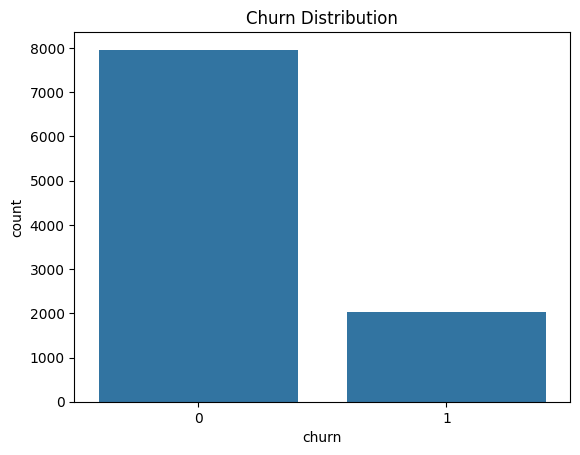

Churn Rate:
 churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(x='churn', data=data)
plt.title('Churn Distribution')
plt.show()

# Calculate churn rates
churn_rate = data['churn'].value_counts(normalize=True)
print("Churn Rate:\n", churn_rate)


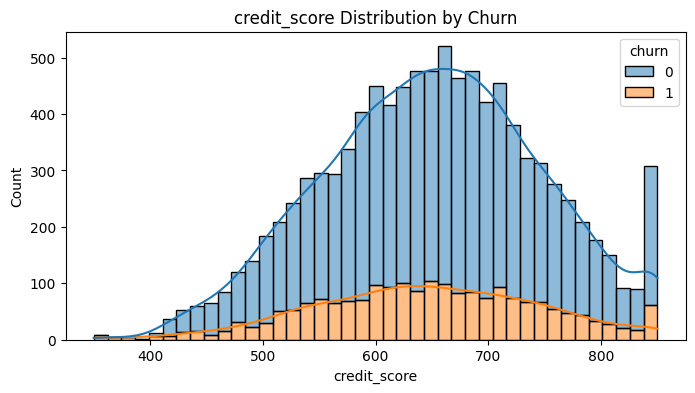

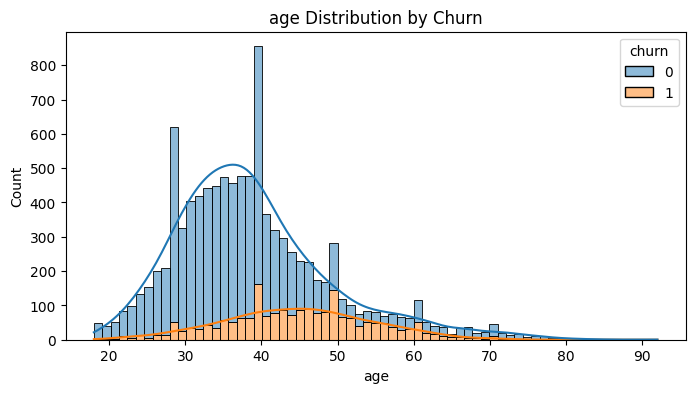

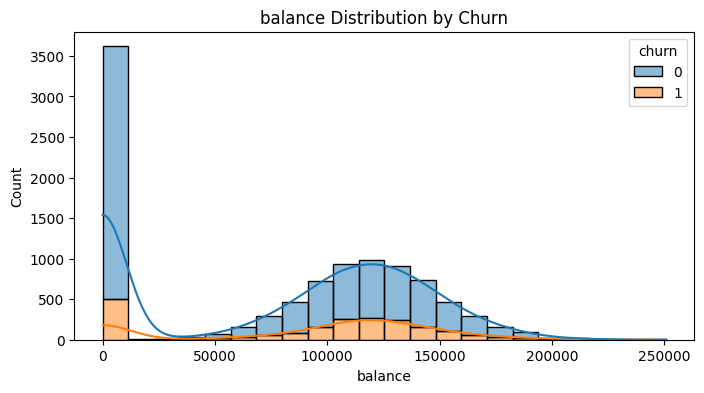

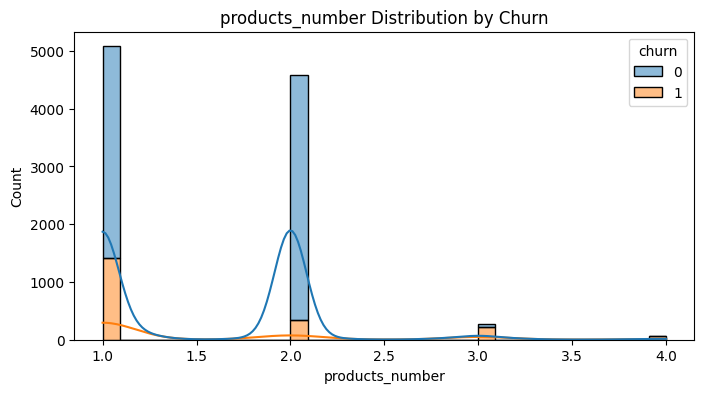

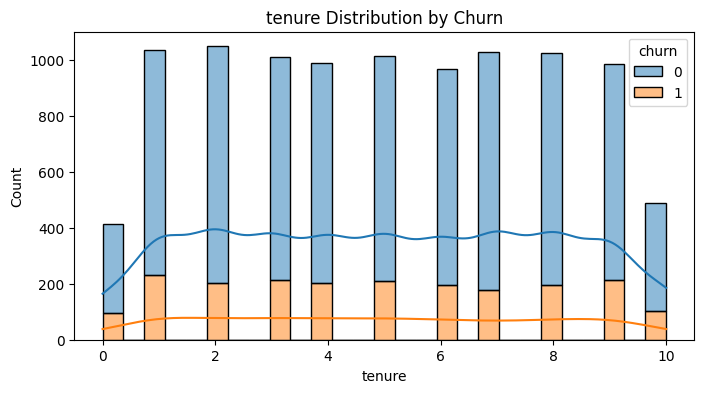

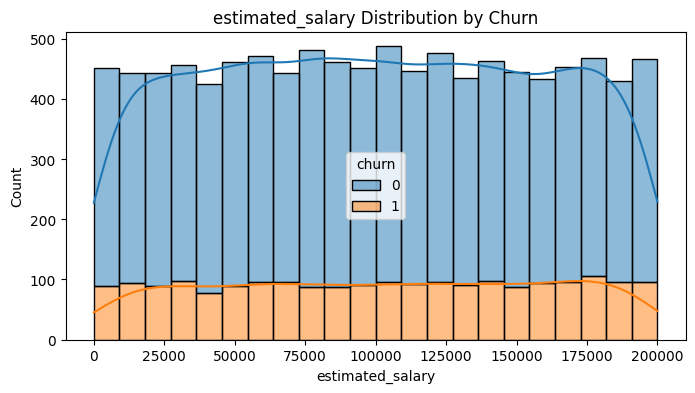

In [27]:
# Plot distributions of key numeric features by churn
features_to_analyze = ['credit_score', 'age', 'balance', 'products_number', 'tenure', 'estimated_salary']
for feature in features_to_analyze:
    plt.figure(figsize=(8, 4))
    sns.histplot(data, x=feature, hue='churn', multiple='stack', kde=True)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


Column 'country' not found in the DataFrame.
Column 'gender' not found in the DataFrame.


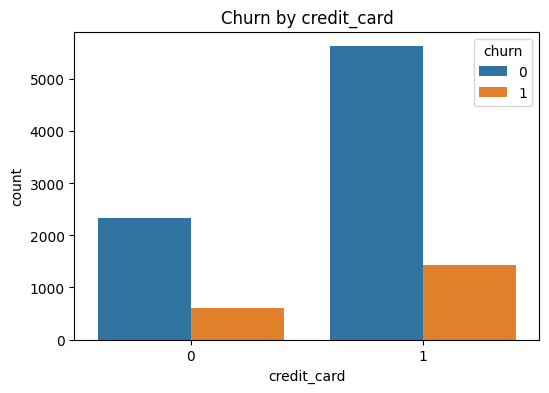

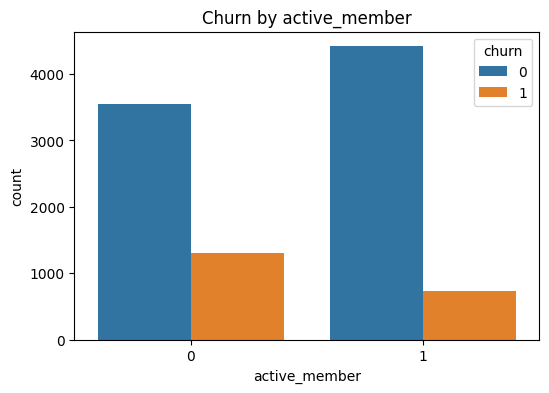

In [29]:
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
for feature in categorical_features:
    # Check if the column exists in the DataFrame
    if feature in data.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=feature, hue='churn', data=data)
        plt.title(f'Churn by {feature}')
        plt.show()
    else:
        print(f"Column '{feature}' not found in the DataFrame.")


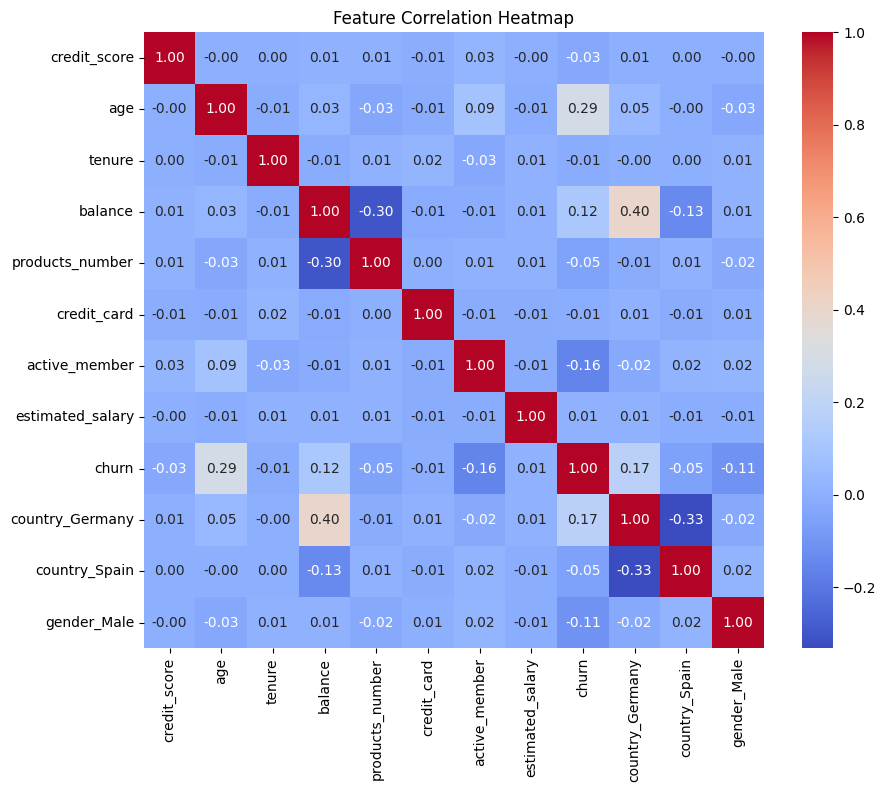

In [30]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


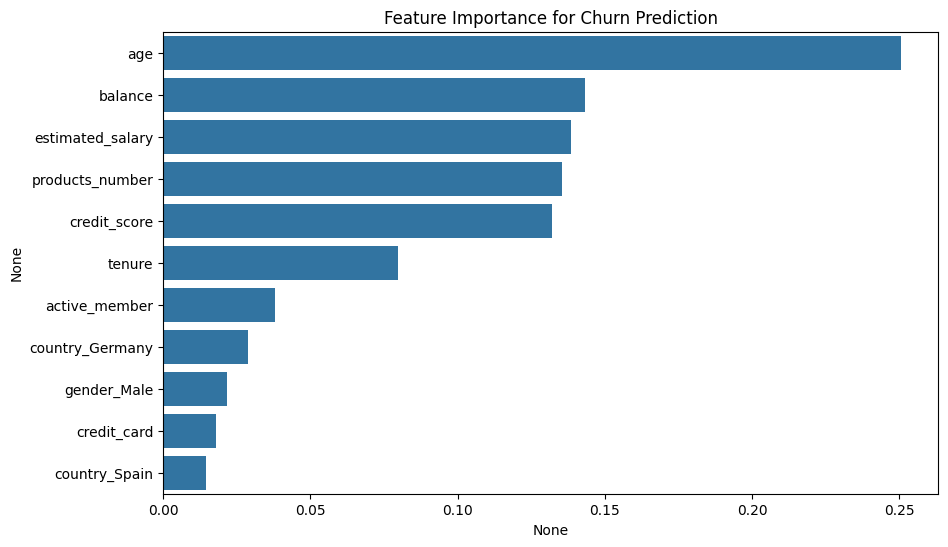

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest to determine feature importance
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance for Churn Prediction")
plt.show()


In [ ]:
import shap

# Use the Random Forest model trained above
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train)

# Summary plot for global feature importance
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

# SHAP value for individual prediction (first instance as example)
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_train.iloc[0])


In [ ]:
from lime import lime_tabular

# Initialize LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode='classification',
    feature_names=X.columns,
    class_names=['Not Churned', 'Churned'],
    discretize_continuous=True
)

# Explain a prediction (first instance as an example)
exp = explainer.explain_instance(X_test[0], rf.predict_proba)
exp.show_in_notebook()
